In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [2]:
SEED = 42

In [3]:
df_housing = pd.read_csv('./housing.csv')
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:>

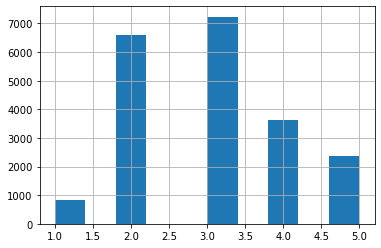

In [4]:
df_housing['income_cat'] = pd.cut(
    df_housing['median_income'],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)
df_housing['income_cat'].hist()

In [5]:
df_train, df_test = train_test_split(df_housing, test_size=0.2, random_state=SEED)
print(f"len(df_train) = {len(df_train)}")
print(f"len(df_test) = {len(df_test)}")

len(df_train) = 16512
len(df_test) = 4128


In [6]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
for train_index, test_index in split.split(df_housing, df_housing['income_cat']):
    df_train_strat = df_housing.loc[train_index]
    df_test_strat = df_housing.loc[test_index]
    
print(f"len(df_train_strat) = {len(df_train_strat)}")
print(f"len(df_test_strat) = {len(df_test_strat)}")

len(df_train_strat) = 16512
len(df_test_strat) = 4128


In [7]:
df_compare = pd.DataFrame({
    'overall': df_housing["income_cat"].value_counts() / len(df_housing),
    'strat': df_test_strat["income_cat"].value_counts() / len(df_test_strat),
    'random': df_test["income_cat"].value_counts() / len(df_test)
}).sort_index()

df_compare['strat_pct_error'] = 100 * df_compare['strat'] / df_compare['overall'] - 100
df_compare['random_pct_error'] = 100 * df_compare['random'] / df_compare['overall'] - 100

df_compare

,overall,strat,random,strat_pct_error,random_pct_error
1,0.039826,0.039729,0.040213,-0.243309,0.973236
2,0.318847,0.318798,0.324370,-0.015195,1.732260
3,0.350581,0.350533,0.358527,-0.013820,2.266446
4,0.176308,0.176357,0.167393,0.027480,-5.056334
5,0.114438,0.114583,0.109496,0.127011,-4.318374
